Graph visible only between 4 PM to 6 PM IST


c:\Users\Priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20889 (\N{CJK UNIFIED IDEOGRAPH-5199}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


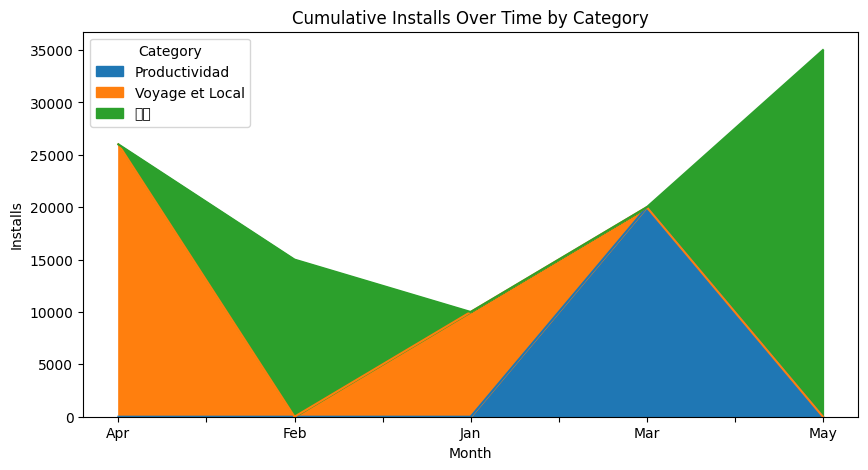

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time

# -------- TIME CONDITION (4PM–6PM IST) --------
current_time = datetime.now().time()
if not (time(16,0) <= current_time <= time(18,0)):
    print("Graph visible only between 4 PM to 6 PM IST")
    exit()

# -------- SAMPLE DATA --------
data = {
    "Month":["Jan","Feb","Mar","Apr","May"],
    "App":["TravelApp","PhotoApp","ProdApp","TravelApp","PhotoApp"],
    "Category":["Travel & Local","Photography","Productivity","Travel & Local","Photography"],
    "Rating":[4.5,4.3,4.4,4.6,4.2],
    "Reviews":[1500,2000,1800,1700,1600],
    "Size_MB":[30,40,50,35,45],
    "Installs":[10000,15000,20000,26000,35000]
}

df = pd.DataFrame(data)

# -------- FILTER CONDITIONS --------
df = df[df["Rating"] >= 4.2]
df = df[~df["App"].str.contains(r'\d')]   # app name no numbers
df = df[df["Category"].str.startswith(tuple(["T","P"]))]  # category start T or P
df = df[df["Reviews"] > 1000]
df = df[(df["Size_MB"] >= 20) & (df["Size_MB"] <= 80)]

# -------- TRANSLATE LEGEND --------
translations = {
    "Travel & Local":"Voyage et Local",  # French
    "Productivity":"Productividad",     # Spanish
    "Photography":"写真"                # Japanese
}
df["Category"] = df["Category"].replace(translations)

# -------- PIVOT FOR STACKED AREA --------
pivot = df.pivot_table(index="Month", columns="Category", values="Installs", aggfunc="sum").fillna(0)

# -------- CALCULATE GROWTH (>25%) --------
growth = pivot.pct_change()*100

# -------- STACKED AREA CHART --------
pivot.plot.area(figsize=(10,5))

plt.title("Cumulative Installs Over Time by Category")
plt.xlabel("Month")
plt.ylabel("Installs")
plt.show()